In [13]:
import pandas as pd

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
user=pd.read_csv('data/JData_User.csv',encoding='gbk')

In [18]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105321 entries, 0 to 105320
Data columns (total 5 columns):
user_id        105321 non-null int64
age            105318 non-null object
sex            105318 non-null float64
user_lv_cd     105321 non-null int64
user_reg_tm    105318 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


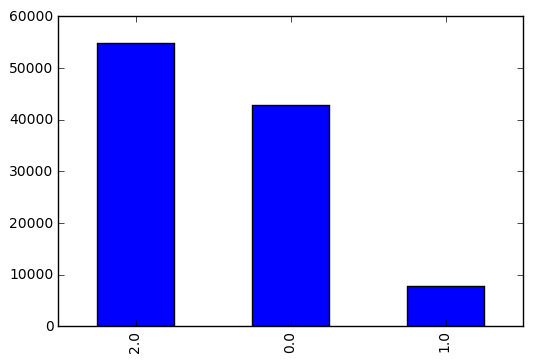

In [19]:
user['sex'].value_counts().plot(kind='bar')

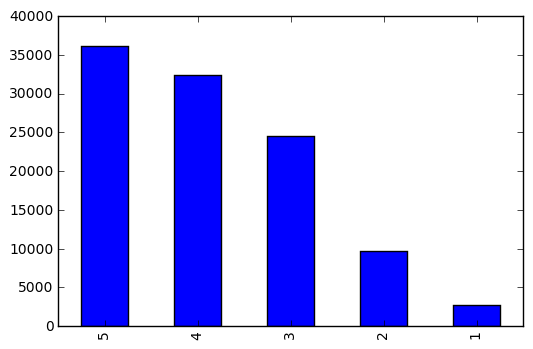

In [20]:
user['user_lv_cd'].value_counts().plot(kind='bar')

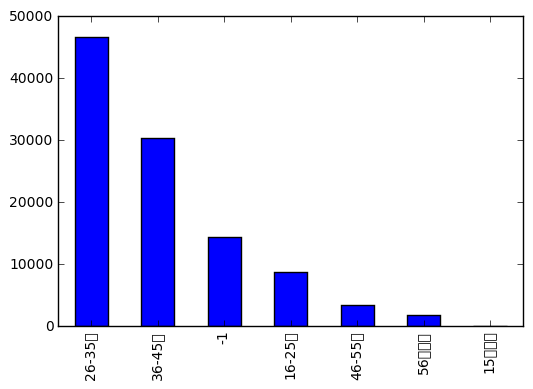

In [21]:
user['age'].value_counts().plot(kind='bar')

In [22]:
comment = pd.read_csv('data/JData_Comment.csv',encoding='gbk')

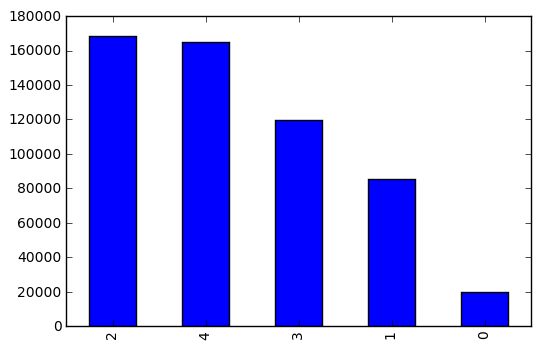

In [23]:
comment['comment_num'].value_counts().plot(kind='bar') 


In [28]:
action2 = pd.read_csv('data/JData_Action_201602.csv',encoding='gbk')
action3 = pd.read_csv('data/JData_Action_201603.csv',encoding='gbk')
#action32 = pd.read_csv('data/JData_Action_201603.csv',encoding="gbk")
action4 = pd.read_csv('data/JData_Action_201604.csv',encoding='gbk')

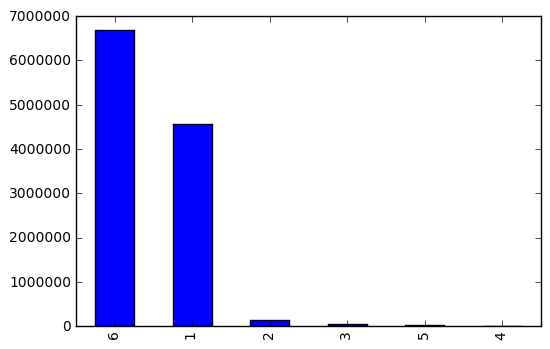

In [29]:
action2.type.value_counts().plot(kind='bar')

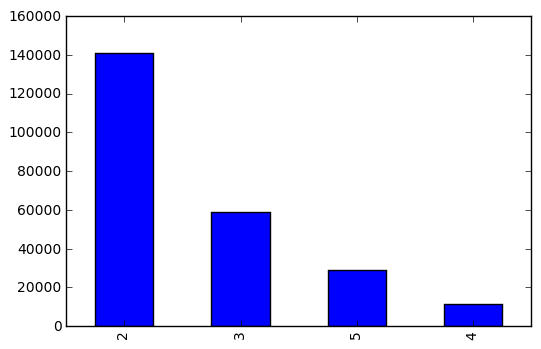

In [30]:
action2[(action2['type']!=6) & (action2['type']!=1)]['type'].value_counts().plot(kind='bar')


In [32]:
action_df=pd.concat([action2,action3,action4])
action_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50601736 entries, 0 to 13199933
Data columns (total 7 columns):
user_id     float64
sku_id      int64
time        object
model_id    float64
type        int64
cate        int64
brand       int64
dtypes: float64(2), int64(4), object(1)
memory usage: 3.0+ GB


In [33]:
sku_action_df=action_df.groupby(['sku_id','type'],as_index=False)['user_id'].count()
sku_action_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90876 entries, 0 to 90875
Data columns (total 3 columns):
sku_id     90876 non-null int64
type       90876 non-null int64
user_id    90876 non-null int64
dtypes: int64(3)
memory usage: 2.8 MB


In [34]:
sku_pivot_table=sku_action_df.pivot_table('user_id',index='sku_id',columns='type',aggfunc=sum)
sku_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28710 entries, 2 to 171225
Data columns (total 6 columns):
1    28190 non-null float64
2    12032 non-null float64
3    10238 non-null float64
4    4268 non-null float64
5    8519 non-null float64
6    27629 non-null float64
dtypes: float64(6)
memory usage: 1.5 MB


In [35]:
sku_pivot_table.fillna(0,inplace=True)
sku_pivot_table.head(10)

type,1,2,3,4,5,6
sku_id,,,,,,
2,55.0,0.0,0.0,0.0,0.0,79.0
18,2.0,0.0,0.0,0.0,0.0,2.0
36,107.0,4.0,0.0,0.0,1.0,186.0
37,5.0,0.0,0.0,0.0,0.0,10.0
40,79.0,2.0,2.0,0.0,0.0,179.0
41,2.0,0.0,0.0,0.0,0.0,4.0
43,336.0,1.0,1.0,0.0,2.0,524.0
45,3.0,0.0,0.0,0.0,0.0,4.0
47,1.0,0.0,0.0,0.0,0.0,3.0


In [36]:
user_action_df=action_df.groupby(['user_id','type'],as_index=False)['time'].count()
user_action_df.head(10)

,user_id,type,time
0,200001.0,1,212
1,200001.0,2,22
2,200001.0,3,13
3,200001.0,4,1
4,200001.0,6,414
5,200002.0,1,238
6,200002.0,2,1
7,200002.0,6,484
8,200003.0,1,221
9,200003.0,2,4


In [37]:
user_pivot_table=user_action_df.pivot_table('time',index='user_id',columns='type',aggfunc=sum)

In [38]:
user_pivot_table.fillna(0,inplace=True)

In [39]:
user_pivot_table.head(10)

type,1,2,3,4,5,6
user_id,,,,,,
200001.0,212.0,22.0,13.0,1.0,0.0,414.0
200002.0,238.0,1.0,0.0,0.0,0.0,484.0
200003.0,221.0,4.0,1.0,0.0,1.0,420.0
200004.0,52.0,0.0,0.0,0.0,0.0,61.0
200005.0,106.0,2.0,3.0,1.0,2.0,161.0
200006.0,182.0,0.0,0.0,0.0,4.0,183.0
200007.0,312.0,4.0,4.0,0.0,0.0,472.0
200008.0,102.0,0.0,0.0,0.0,0.0,209.0
200009.0,11.0,0.0,0.0,0.0,0.0,0.0


In [40]:
sku_pivot_table['change_rate']=sku_pivot_table[4.0]/sku_pivot_table[1.0]

In [41]:
sku_pivot_table[sku_pivot_table['change_rate']!=0].head(10)

type,1,2,3,4,5,6,change_rate
sku_id,,,,,,,
50,1202.0,20.0,13.0,1.0,2.0,1550.0,0.000832
52,1113.0,19.0,13.0,1.0,4.0,1626.0,0.000898
87,41.0,4.0,0.0,1.0,0.0,75.0,0.024390
95,472.0,6.0,2.0,1.0,5.0,755.0,0.002119
156,8436.0,195.0,72.0,18.0,44.0,12423.0,0.002134
169,5547.0,131.0,76.0,3.0,35.0,8550.0,0.000541
211,6371.0,193.0,101.0,23.0,43.0,9955.0,0.003610
275,595.0,13.0,4.0,1.0,6.0,814.0,0.001681
276,6043.0,111.0,54.0,6.0,20.0,10469.0,0.000993


In [42]:
sku_pivot_table['change_rate'].describe()

count    2.819700e+04
mean              inf
std               NaN
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max               inf
Name: change_rate, dtype: float64

In [43]:
user_pivot_table[6.0].describe()

count    105180.000000
mean        291.222133
std         460.030844
min           0.000000
25%          59.000000
50%         148.000000
75%         342.000000
max       15302.000000
Name: 6, dtype: float64

In [44]:
user_pivot_table[user_pivot_table[6.0]>=10000.0]

type,1,2,3,4,5,6
user_id,,,,,,
222248.0,5267.0,143.0,111.0,2.0,47.0,10443.0
229662.0,7605.0,6.0,2.0,3.0,0.0,10595.0
237793.0,6454.0,182.0,79.0,3.0,36.0,15302.0
238543.0,4993.0,7.0,3.0,0.0,1.0,13952.0
255920.0,4063.0,143.0,104.0,1.0,0.0,15006.0
271592.0,6361.0,63.0,55.0,6.0,4.0,13705.0
279524.0,4510.0,78.0,44.0,1.0,0.0,10217.0
290880.0,4290.0,69.0,45.0,0.0,1.0,11514.0
296877.0,6608.0,31.0,10.0,0.0,2.0,12397.0


In [45]:
action_df[(action_df['user_id']==27622) & (action_df['type']==1.0)]

,user_id,sku_id,time,model_id,type,cate,brand


In [46]:
product_df=pd.read_csv('data/JData_Product.csv',encoding="gbk")
product_df.head(10)

,sku_id,a1,a2,a3,cate,brand
0,10,3,1,1,8,489
1,100002,3,2,2,8,489
2,100003,1,-1,-1,8,30
3,100006,1,2,1,8,545
4,10001,-1,1,2,8,244
5,100016,3,-1,2,8,214
6,100029,3,2,2,8,214
7,10003,3,1,2,8,214
8,100045,2,2,2,8,124
9,100057,3,1,2,8,306


In [49]:
product_df['a1'].describe()

count    24187.000000
mean         2.176996
std          1.176116
min         -1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: a1, dtype: float64

In [50]:
user_pivot_table['user_id']=user_pivot_table.index
merge_user=pd.merge(user_pivot_table,user,how='outer')
merge_user.head(10)

,1,2,3,4,5,6,user_id,age,sex,user_lv_cd,user_reg_tm
0,212.0,22.0,13.0,1.0,0.0,414.0,200001.0,56岁以上,2.0,5,2016-01-26
1,238.0,1.0,0.0,0.0,0.0,484.0,200002.0,-1,0.0,1,2016-01-26
2,221.0,4.0,1.0,0.0,1.0,420.0,200003.0,36-45岁,1.0,4,2016-01-26
3,52.0,0.0,0.0,0.0,0.0,61.0,200004.0,-1,2.0,1,2016-01-26
4,106.0,2.0,3.0,1.0,2.0,161.0,200005.0,16-25岁,0.0,4,2016-01-26
5,182.0,0.0,0.0,0.0,4.0,183.0,200006.0,36-45岁,2.0,2,2013-04-10
6,312.0,4.0,4.0,0.0,0.0,472.0,200007.0,36-45岁,2.0,3,2016-01-26
7,102.0,0.0,0.0,0.0,0.0,209.0,200008.0,-1,2.0,3,2016-01-26
8,11.0,0.0,0.0,0.0,0.0,0.0,200009.0,36-45岁,2.0,2,2016-01-26
9,34.0,4.0,1.0,0.0,0.0,51.0,200010.0,36-45岁,2.0,3,2016-01-26


In [51]:
merge_user['sum']=merge_user[2.0]+merge_user[3.0]+merge_user[4.0]+merge_user[5.0]

In [52]:
merge_user.head(10)

,1,2,3,4,5,6,user_id,age,sex,user_lv_cd,user_reg_tm,sum
0,212.0,22.0,13.0,1.0,0.0,414.0,200001.0,56岁以上,2.0,5,2016-01-26,36.0
1,238.0,1.0,0.0,0.0,0.0,484.0,200002.0,-1,0.0,1,2016-01-26,1.0
2,221.0,4.0,1.0,0.0,1.0,420.0,200003.0,36-45岁,1.0,4,2016-01-26,6.0
3,52.0,0.0,0.0,0.0,0.0,61.0,200004.0,-1,2.0,1,2016-01-26,0.0
4,106.0,2.0,3.0,1.0,2.0,161.0,200005.0,16-25岁,0.0,4,2016-01-26,8.0
5,182.0,0.0,0.0,0.0,4.0,183.0,200006.0,36-45岁,2.0,2,2013-04-10,4.0
6,312.0,4.0,4.0,0.0,0.0,472.0,200007.0,36-45岁,2.0,3,2016-01-26,8.0
7,102.0,0.0,0.0,0.0,0.0,209.0,200008.0,-1,2.0,3,2016-01-26,0.0
8,11.0,0.0,0.0,0.0,0.0,0.0,200009.0,36-45岁,2.0,2,2016-01-26,0.0
9,34.0,4.0,1.0,0.0,0.0,51.0,200010.0,36-45岁,2.0,3,2016-01-26,5.0


In [53]:
merge_user.groupby('age')['sum'].describe()

age          
-1      count    14378.000000
        mean         6.361107
        std         13.815458
        min          0.000000
        25%          0.000000
        50%          2.000000
        75%          7.000000
        max        523.000000
15岁以下   count        7.000000
        mean         4.571429
        std          4.353433
        min          0.000000
        25%          2.000000
        50%          3.000000
        75%          6.500000
        max         12.000000
16-25岁  count     8789.000000
        mean         9.000341
        std         15.895887
        min          0.000000
        25%          0.000000
        50%          4.000000
        75%         11.000000
        max        250.000000
26-35岁  count    46513.000000
        mean        10.455271
        std         17.760326
        min          0.000000
        25%          1.000000
        50%          5.000000
        75%         13.000000
        max        616.000000
36-45岁  count    30301.000

In [54]:
merge_user.groupby('user_lv_cd')['sum'].describe()

user_lv_cd       
1           count     2656.000000
            mean         4.094127
            std         10.324426
            min          0.000000
            25%          0.000000
            50%          1.000000
            75%          4.000000
            max        190.000000
2           count     9640.000000
            mean         3.959647
            std          9.416867
            min          0.000000
            25%          0.000000
            50%          1.000000
            75%          4.000000
            max        252.000000
3           count    24526.000000
            mean         6.132186
            std         10.720186
            min          0.000000
            25%          0.000000
            50%          2.000000
            75%          7.000000
            max        201.000000
4           count    32310.000000
            mean         9.197307
            std         15.527821
            min          0.000000
            25%          1.000

In [65]:
merge_user[merge_user['user_reg_tm']>'2016/4/15'].count()

1              0
2              0
3              0
4              0
5              0
6              0
user_id        0
age            0
sex            0
user_lv_cd     0
user_reg_tm    0
sum            0
dtype: int64

In [66]:
comment[(comment['comment_num']==2) & (comment['bad_comment_rate']>=0.5)].count()

dt                  7026
sku_id              7026
comment_num         7026
has_bad_comment     7026
bad_comment_rate    7026
dtype: int64

In [67]:
sku_pivot_table['sku_id']=sku_pivot_table.index
merge_sku=pd.merge(sku_pivot_table,comment,how='outer')
merge_sku.head(10)

,1,2,3,4,5,6,change_rate,sku_id,dt,comment_num,has_bad_comment,bad_comment_rate
0,55.0,0.0,0.0,0.0,0.0,79.0,0.0,2,NaN,NaN,NaN,NaN
1,2.0,0.0,0.0,0.0,0.0,2.0,0.0,18,2016-02-01,4.0,1.0,0.0144
2,2.0,0.0,0.0,0.0,0.0,2.0,0.0,18,2016-02-08,4.0,1.0,0.0144
3,2.0,0.0,0.0,0.0,0.0,2.0,0.0,18,2016-02-15,4.0,1.0,0.0144
4,2.0,0.0,0.0,0.0,0.0,2.0,0.0,18,2016-02-22,4.0,1.0,0.0144
5,2.0,0.0,0.0,0.0,0.0,2.0,0.0,18,2016-02-29,4.0,1.0,0.0144
6,2.0,0.0,0.0,0.0,0.0,2.0,0.0,18,2016-03-07,4.0,1.0,0.0144
7,2.0,0.0,0.0,0.0,0.0,2.0,0.0,18,2016-03-14,4.0,1.0,0.0144
8,2.0,0.0,0.0,0.0,0.0,2.0,0.0,18,2016-03-21,4.0,1.0,0.0144
9,2.0,0.0,0.0,0.0,0.0,2.0,0.0,18,2016-03-28,4.0,1.0,0.0144


In [68]:
merge_sku[(merge_sku['has_bad_comment']==0) & (merge_sku['comment_num']>0)][4.0].describe()

count    94239.000000
mean         0.230223
std          2.193898
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        192.000000
Name: 4, dtype: float64

In [69]:
action_df.groupby(['model_id'])['user_id'].count()

model_id
0.0      12112574
11.0        74777
12.0        23131
13.0       108323
14.0        95793
15.0        10130
16.0        67316
17.0       220852
18.0        29800
19.0       116766
21.0       349610
22.0        10306
23.0       123880
24.0       568860
25.0        91814
26.0      1388148
27.0      1468903
28.0        79186
29.0       486169
31.0       112592
32.0         9415
33.0         7403
34.0        14619
35.0         7436
36.0         5949
37.0         5142
38.0         5667
39.0         3427
110.0       27623
111.0      228742
           ...   
319.0        1928
320.0        1977
321.0        1872
322.0        2256
323.0        1917
324.0        1740
325.0        1427
326.0        1446
327.0        1397
328.0        1296
329.0        1282
330.0        1030
331.0        1200
332.0         518
333.0         958
334.0         487
335.0         550
336.0         672
337.0         553
338.0         496
339.0         830
340.0         941
341.0         682
342.0         403
3

In [70]:
merge_sku[merge_sku['comment_num']==4][4.0].describe()

count    92536.000000
mean         5.795950
std         22.704061
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        691.000000
Name: 4, dtype: float64

In [71]:
merge_sku[merge_sku['comment_num']==3][4.0].describe()

count    45955.000000
mean         0.386073
std          2.409886
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        192.000000
Name: 4, dtype: float64

In [72]:
merge_sku[merge_sku['comment_num']==2][4.0].describe()

count    59202.000000
mean         0.134404
std          0.958996
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        101.000000
Name: 4, dtype: float64

In [73]:
#删除规定时间之后注册的用户
clean_user=user[user['user_reg_tm']<='2016/4/15']
clean_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105318 entries, 0 to 105320
Data columns (total 5 columns):
user_id        105318 non-null int64
age            105318 non-null object
sex            105318 non-null float64
user_lv_cd     105318 non-null int64
user_reg_tm    105318 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [74]:
merge_user[merge_user['sum']==0]['user_id'].head(10)

3     200004.0
7     200008.0
8     200009.0
10    200011.0
11    200012.0
12    200013.0
22    200023.0
25    200026.0
28    200029.0
38    200039.0
Name: user_id, dtype: float64

In [75]:
merge_user.head(10)

,1,2,3,4,5,6,user_id,age,sex,user_lv_cd,user_reg_tm,sum
0,212.0,22.0,13.0,1.0,0.0,414.0,200001.0,56岁以上,2.0,5,2016-01-26,36.0
1,238.0,1.0,0.0,0.0,0.0,484.0,200002.0,-1,0.0,1,2016-01-26,1.0
2,221.0,4.0,1.0,0.0,1.0,420.0,200003.0,36-45岁,1.0,4,2016-01-26,6.0
3,52.0,0.0,0.0,0.0,0.0,61.0,200004.0,-1,2.0,1,2016-01-26,0.0
4,106.0,2.0,3.0,1.0,2.0,161.0,200005.0,16-25岁,0.0,4,2016-01-26,8.0
5,182.0,0.0,0.0,0.0,4.0,183.0,200006.0,36-45岁,2.0,2,2013-04-10,4.0
6,312.0,4.0,4.0,0.0,0.0,472.0,200007.0,36-45岁,2.0,3,2016-01-26,8.0
7,102.0,0.0,0.0,0.0,0.0,209.0,200008.0,-1,2.0,3,2016-01-26,0.0
8,11.0,0.0,0.0,0.0,0.0,0.0,200009.0,36-45岁,2.0,2,2016-01-26,0.0
9,34.0,4.0,1.0,0.0,0.0,51.0,200010.0,36-45岁,2.0,3,2016-01-26,5.0


In [77]:
no_action_id_list=merge_user[(merge_user['sum']==0) & (merge_user['user_reg_tm']<'2016/2/01')]['user_id']

In [78]:
#删除三个月没有购买行为的用户，同时注册时间大于三个月
clean_user=clean_user[clean_user['user_id'].isin(no_action_id_list)==False]

In [79]:
merge_user['1-6sum']=merge_user[1.0]+merge_user[2.0]+merge_user[3.0]+merge_user[4.0]+merge_user[5.0]+merge_user[6.0]

In [80]:
merge_user.head(10)

,1,2,3,4,5,6,user_id,age,sex,user_lv_cd,user_reg_tm,sum,1-6sum
0,212.0,22.0,13.0,1.0,0.0,414.0,200001.0,56岁以上,2.0,5,2016-01-26,36.0,662.0
1,238.0,1.0,0.0,0.0,0.0,484.0,200002.0,-1,0.0,1,2016-01-26,1.0,723.0
2,221.0,4.0,1.0,0.0,1.0,420.0,200003.0,36-45岁,1.0,4,2016-01-26,6.0,647.0
3,52.0,0.0,0.0,0.0,0.0,61.0,200004.0,-1,2.0,1,2016-01-26,0.0,113.0
4,106.0,2.0,3.0,1.0,2.0,161.0,200005.0,16-25岁,0.0,4,2016-01-26,8.0,275.0
5,182.0,0.0,0.0,0.0,4.0,183.0,200006.0,36-45岁,2.0,2,2013-04-10,4.0,369.0
6,312.0,4.0,4.0,0.0,0.0,472.0,200007.0,36-45岁,2.0,3,2016-01-26,8.0,792.0
7,102.0,0.0,0.0,0.0,0.0,209.0,200008.0,-1,2.0,3,2016-01-26,0.0,311.0
8,11.0,0.0,0.0,0.0,0.0,0.0,200009.0,36-45岁,2.0,2,2016-01-26,0.0,11.0
9,34.0,4.0,1.0,0.0,0.0,51.0,200010.0,36-45岁,2.0,3,2016-01-26,5.0,90.0


In [81]:
action_df.head(10)

,user_id,sku_id,time,model_id,type,cate,brand
0,266079.0,138778,2016-01-31 23:59:02,NaN,1,8,403
1,266079.0,138778,2016-01-31 23:59:03,0.0,6,8,403
2,200719.0,61226,2016-01-31 23:59:07,NaN,1,8,30
3,200719.0,61226,2016-01-31 23:59:08,0.0,6,8,30
4,263587.0,72348,2016-01-31 23:59:08,NaN,1,5,159
5,296130.0,103126,2016-01-31 23:59:11,NaN,1,4,174
6,296130.0,103126,2016-01-31 23:59:11,0.0,6,4,174
7,296130.0,103126,2016-01-31 23:59:11,0.0,6,4,174
8,217892.0,137328,2016-01-31 23:59:14,111.0,6,6,159
9,283139.0,4732,2016-01-31 23:59:14,NaN,1,6,375


In [82]:
action_df['date']=action_df['time'].str[:10]
action_df.head(10)

,user_id,sku_id,time,model_id,type,cate,brand,date
0,266079.0,138778,2016-01-31 23:59:02,NaN,1,8,403,2016-01-31
1,266079.0,138778,2016-01-31 23:59:03,0.0,6,8,403,2016-01-31
2,200719.0,61226,2016-01-31 23:59:07,NaN,1,8,30,2016-01-31
3,200719.0,61226,2016-01-31 23:59:08,0.0,6,8,30,2016-01-31
4,263587.0,72348,2016-01-31 23:59:08,NaN,1,5,159,2016-01-31
5,296130.0,103126,2016-01-31 23:59:11,NaN,1,4,174,2016-01-31
6,296130.0,103126,2016-01-31 23:59:11,0.0,6,4,174,2016-01-31
7,296130.0,103126,2016-01-31 23:59:11,0.0,6,4,174,2016-01-31
8,217892.0,137328,2016-01-31 23:59:14,111.0,6,6,159,2016-01-31
9,283139.0,4732,2016-01-31 23:59:14,NaN,1,6,375,2016-01-31


In [83]:
action_drop_same_date_df=action_df.drop_duplicates(['user_id','date'],keep='last')
action_drop_same_date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301546 entries, 7 to 13199933
Data columns (total 8 columns):
user_id     1301546 non-null float64
sku_id      1301546 non-null int64
time        1301546 non-null object
model_id    722984 non-null float64
type        1301546 non-null int64
cate        1301546 non-null int64
brand       1301546 non-null int64
date        1301546 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 89.4+ MB


In [84]:
action_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50601736 entries, 0 to 13199933
Data columns (total 8 columns):
user_id     float64
sku_id      int64
time        object
model_id    float64
type        int64
cate        int64
brand       int64
date        object
dtypes: float64(2), int64(4), object(2)
memory usage: 3.4+ GB


In [85]:
#用户浏览天数的分布
user_date_df=action_drop_same_date_df.groupby('user_id',as_index=False)['date'].count()
user_date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105180 entries, 0 to 105179
Data columns (total 2 columns):
user_id    105180 non-null float64
date       105180 non-null int64
dtypes: float64(1), int64(1)
memory usage: 2.4 MB


In [86]:
merge_user=pd.merge(merge_user,user_date_df,how='outer')

In [87]:
merge_user.head(10)

,1,2,3,4,5,6,user_id,age,sex,user_lv_cd,user_reg_tm,sum,1-6sum,date
0,212.0,22.0,13.0,1.0,0.0,414.0,200001.0,56岁以上,2.0,5,2016-01-26,36.0,662.0,22.0
1,238.0,1.0,0.0,0.0,0.0,484.0,200002.0,-1,0.0,1,2016-01-26,1.0,723.0,19.0
2,221.0,4.0,1.0,0.0,1.0,420.0,200003.0,36-45岁,1.0,4,2016-01-26,6.0,647.0,13.0
3,52.0,0.0,0.0,0.0,0.0,61.0,200004.0,-1,2.0,1,2016-01-26,0.0,113.0,4.0
4,106.0,2.0,3.0,1.0,2.0,161.0,200005.0,16-25岁,0.0,4,2016-01-26,8.0,275.0,9.0
5,182.0,0.0,0.0,0.0,4.0,183.0,200006.0,36-45岁,2.0,2,2013-04-10,4.0,369.0,7.0
6,312.0,4.0,4.0,0.0,0.0,472.0,200007.0,36-45岁,2.0,3,2016-01-26,8.0,792.0,8.0
7,102.0,0.0,0.0,0.0,0.0,209.0,200008.0,-1,2.0,3,2016-01-26,0.0,311.0,12.0
8,11.0,0.0,0.0,0.0,0.0,0.0,200009.0,36-45岁,2.0,2,2016-01-26,0.0,11.0,8.0
9,34.0,4.0,1.0,0.0,0.0,51.0,200010.0,36-45岁,2.0,3,2016-01-26,5.0,90.0,4.0


In [88]:
merge_user['action_per_day']=merge_user['1-6sum']/merge_user['date']

In [89]:
merge_user['action_per_day'].describe()

count    105180.000000
mean         34.078455
std          31.297766
min           1.000000
25%          14.787338
50%          25.625000
75%          43.297973
max        1457.300000
Name: action_per_day, dtype: float64

In [90]:
merge_user[merge_user['action_per_day']>=500]

,1,2,3,4,5,6,user_id,age,sex,user_lv_cd,user_reg_tm,sum,1-6sum,date,action_per_day
5783,6378.0,135.0,0.0,0.0,45.0,8015.0,205793.0,-1,0.0,1,2016-03-19,180.0,14573.0,10.0,1457.300000
7443,3.0,0.0,0.0,0.0,1.0,991.0,207458.0,-1,2.0,1,2016-04-15,1.0,995.0,1.0,995.000000
7496,290.0,11.0,0.0,0.0,0.0,476.0,207511.0,46-55岁,2.0,5,2016-04-15,11.0,777.0,1.0,777.000000
11570,851.0,9.0,5.0,2.0,3.0,1301.0,211594.0,36-45岁,2.0,4,2013-07-08,19.0,2171.0,3.0,723.666667
38163,3728.0,27.0,17.0,1.0,1.0,6354.0,238222.0,26-35岁,0.0,5,2011-10-23,46.0,10128.0,15.0,675.200000
49131,692.0,29.0,8.0,1.0,0.0,1378.0,249201.0,36-45岁,0.0,5,2014-07-01,38.0,2108.0,4.0,527.000000
74215,2430.0,13.0,12.0,1.0,34.0,5030.0,274318.0,26-35岁,2.0,4,2015-04-13,60.0,7520.0,14.0,537.142857
89571,2489.0,10.0,3.0,0.0,24.0,5614.0,289694.0,-1,2.0,1,2015-09-09,37.0,8140.0,15.0,542.666667


In [91]:
merge_user[merge_user['1-6sum']>=10000]

,1,2,3,4,5,6,user_id,age,sex,user_lv_cd,user_reg_tm,sum,1-6sum,date,action_per_day
117,7114.0,173.0,119.0,4.0,15.0,9010.0,200118.0,26-35岁,1.0,4,2016-01-27,311.0,16435.0,52.0,316.057692
3270,4120.0,233.0,188.0,0.0,22.0,5853.0,203275.0,26-35岁,0.0,4,2010-08-20,443.0,10416.0,73.0,142.684932
5783,6378.0,135.0,0.0,0.0,45.0,8015.0,205793.0,-1,0.0,1,2016-03-19,180.0,14573.0,10.0,1457.300000
7068,6230.0,48.0,40.0,1.0,96.0,9733.0,207081.0,26-35岁,0.0,5,2013-05-25,185.0,16148.0,59.0,273.694915
8031,4086.0,129.0,63.0,3.0,15.0,7634.0,208048.0,16-25岁,2.0,5,2013-06-04,210.0,11930.0,37.0,322.432432
9424,4914.0,35.0,10.0,0.0,0.0,7660.0,209445.0,26-35岁,2.0,4,2013-06-15,45.0,12619.0,67.0,188.343284
11706,4425.0,45.0,31.0,7.0,0.0,8156.0,211730.0,26-35岁,0.0,5,2010-10-02,83.0,12664.0,57.0,222.175439
12066,6229.0,185.0,178.0,1.0,1.0,9821.0,212090.0,36-45岁,0.0,5,2013-07-18,365.0,16415.0,72.0,227.986111
14690,3432.0,288.0,80.0,5.0,2.0,6667.0,214718.0,26-35岁,0.0,5,2013-09-04,375.0,10474.0,59.0,177.525424
17001,5007.0,164.0,123.0,4.0,2.0,5734.0,217033.0,26-35岁,0.0,4,2009-01-13,293.0,11034.0,52.0,212.192308


In [92]:
merge_user=merge_user[merge_user['1-6sum']>0]

In [93]:
merge_user['buy_view_rate']=merge_user[4.0]/merge_user[1.0]
merge_user['buy_click_rate']=merge_user[4.0]/merge_user[6.0]

In [94]:
merge_user.head(10)

,1,2,3,4,5,6,user_id,age,sex,user_lv_cd,user_reg_tm,sum,1-6sum,date,action_per_day,buy_view_rate,buy_click_rate
0,212.0,22.0,13.0,1.0,0.0,414.0,200001.0,56岁以上,2.0,5,2016-01-26,36.0,662.0,22.0,30.090909,0.004717,0.002415
1,238.0,1.0,0.0,0.0,0.0,484.0,200002.0,-1,0.0,1,2016-01-26,1.0,723.0,19.0,38.052632,0.000000,0.000000
2,221.0,4.0,1.0,0.0,1.0,420.0,200003.0,36-45岁,1.0,4,2016-01-26,6.0,647.0,13.0,49.769231,0.000000,0.000000
3,52.0,0.0,0.0,0.0,0.0,61.0,200004.0,-1,2.0,1,2016-01-26,0.0,113.0,4.0,28.250000,0.000000,0.000000
4,106.0,2.0,3.0,1.0,2.0,161.0,200005.0,16-25岁,0.0,4,2016-01-26,8.0,275.0,9.0,30.555556,0.009434,0.006211
5,182.0,0.0,0.0,0.0,4.0,183.0,200006.0,36-45岁,2.0,2,2013-04-10,4.0,369.0,7.0,52.714286,0.000000,0.000000
6,312.0,4.0,4.0,0.0,0.0,472.0,200007.0,36-45岁,2.0,3,2016-01-26,8.0,792.0,8.0,99.000000,0.000000,0.000000
7,102.0,0.0,0.0,0.0,0.0,209.0,200008.0,-1,2.0,3,2016-01-26,0.0,311.0,12.0,25.916667,0.000000,0.000000
8,11.0,0.0,0.0,0.0,0.0,0.0,200009.0,36-45岁,2.0,2,2016-01-26,0.0,11.0,8.0,1.375000,0.000000,NaN
9,34.0,4.0,1.0,0.0,0.0,51.0,200010.0,36-45岁,2.0,3,2016-01-26,5.0,90.0,4.0,22.500000,0.000000,0.000000


In [95]:
#按照顺序进行排序
merge_user.sort_values(['1-6sum'],ascending=False).head(10)

,1,2,3,4,5,6,user_id,age,sex,user_lv_cd,user_reg_tm,sum,1-6sum,date,action_per_day,buy_view_rate,buy_click_rate
37734,6454.0,182.0,79.0,3.0,36.0,15302.0,237793.0,46-55岁,0.0,5,2011-10-16,300.0,22056.0,69.0,319.652174,0.000465,0.000196
71494,6361.0,63.0,55.0,6.0,4.0,13705.0,271592.0,36-45岁,0.0,5,2015-03-20,128.0,20194.0,72.0,280.472222,0.000943,0.000438
55835,4063.0,143.0,104.0,1.0,0.0,15006.0,255920.0,26-35岁,0.0,4,2012-04-24,248.0,19317.0,56.0,344.946429,0.000246,0.000067
96747,6608.0,31.0,10.0,0.0,2.0,12397.0,296877.0,36-45岁,0.0,5,2015-11-11,43.0,19048.0,54.0,352.740741,0.000000,0.000000
38484,4993.0,7.0,3.0,0.0,1.0,13952.0,238543.0,26-35岁,1.0,5,2011-10-28,11.0,18956.0,53.0,357.660377,0.000000,0.000000
29611,7605.0,6.0,2.0,3.0,0.0,10595.0,229662.0,36-45岁,2.0,4,2014-03-08,11.0,18211.0,49.0,371.653061,0.000394,0.000283
117,7114.0,173.0,119.0,4.0,15.0,9010.0,200118.0,26-35岁,1.0,4,2016-01-27,311.0,16435.0,52.0,316.057692,0.000562,0.000444
12066,6229.0,185.0,178.0,1.0,1.0,9821.0,212090.0,36-45岁,0.0,5,2013-07-18,365.0,16415.0,72.0,227.986111,0.000161,0.000102
7068,6230.0,48.0,40.0,1.0,96.0,9733.0,207081.0,26-35岁,0.0,5,2013-05-25,185.0,16148.0,59.0,273.694915,0.000161,0.000103
22207,5267.0,143.0,111.0,2.0,47.0,10443.0,222248.0,26-35岁,0.0,4,2011-03-05,303.0,16013.0,68.0,235.485294,0.000380,0.000192


In [98]:
#爬虫用户
spider_user_id=merge_user[(merge_user['1-6sum']>=10000) & (merge_user[4.0]==0)]['user_id']
spider_user_id

3270     203275.0
5783     205793.0
9424     209445.0
17680    217713.0
22927    222970.0
38484    238543.0
65556    265648.0
90345    290470.0
90755    290880.0
96747    296877.0
Name: user_id, dtype: float64

In [99]:
#删除爬虫用户
clean_user.info()
clean_user=clean_user[clean_user['user_id'].isin(spider_user_id)==False]
clean_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78750 entries, 0 to 105319
Data columns (total 5 columns):
user_id        78750 non-null int64
age            78750 non-null object
sex            78750 non-null float64
user_lv_cd     78750 non-null int64
user_reg_tm    78750 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78740 entries, 0 to 105319
Data columns (total 5 columns):
user_id        78740 non-null int64
age            78740 non-null object
sex            78740 non-null float64
user_lv_cd     78740 non-null int64
user_reg_tm    78740 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [100]:
merge_sku.drop_duplicates(['sku_id'],keep='last',inplace=True)

In [101]:
merge_sku.head(10)

,1,2,3,4,5,6,change_rate,sku_id,dt,comment_num,has_bad_comment,bad_comment_rate
0,55.0,0.0,0.0,0.0,0.0,79.0,0.000000,2,NaN,NaN,NaN,NaN
12,2.0,0.0,0.0,0.0,0.0,2.0,0.000000,18,2016-04-15,4.0,1.0,0.0144
24,107.0,4.0,0.0,0.0,1.0,186.0,0.000000,36,2016-04-15,3.0,0.0,0.0000
25,5.0,0.0,0.0,0.0,0.0,10.0,0.000000,37,NaN,NaN,NaN,NaN
37,79.0,2.0,2.0,0.0,0.0,179.0,0.000000,40,2016-04-15,3.0,1.0,0.0800
49,2.0,0.0,0.0,0.0,0.0,4.0,0.000000,41,2016-04-15,4.0,1.0,0.0398
61,336.0,1.0,1.0,0.0,2.0,524.0,0.000000,43,2016-04-15,1.0,0.0,0.0000
73,3.0,0.0,0.0,0.0,0.0,4.0,0.000000,45,2016-04-15,2.0,0.0,0.0000
74,1.0,0.0,0.0,0.0,0.0,3.0,0.000000,47,NaN,NaN,NaN,NaN
86,1202.0,20.0,13.0,1.0,2.0,1550.0,0.000832,50,2016-04-15,4.0,1.0,0.0045


In [102]:
merge_sku['2-5sum']=merge_sku[2.0]+merge_sku[3.0]+merge_sku[4.0]+merge_sku[5.0]
merge_sku['1-6sum']=merge_sku['2-5sum']+merge_sku[1.0]+merge_sku[6.0]
merge_sku.head(10)

,1,2,3,4,5,6,change_rate,sku_id,dt,comment_num,has_bad_comment,bad_comment_rate,2-5sum,1-6sum
0,55.0,0.0,0.0,0.0,0.0,79.0,0.000000,2,NaN,NaN,NaN,NaN,0.0,134.0
12,2.0,0.0,0.0,0.0,0.0,2.0,0.000000,18,2016-04-15,4.0,1.0,0.0144,0.0,4.0
24,107.0,4.0,0.0,0.0,1.0,186.0,0.000000,36,2016-04-15,3.0,0.0,0.0000,5.0,298.0
25,5.0,0.0,0.0,0.0,0.0,10.0,0.000000,37,NaN,NaN,NaN,NaN,0.0,15.0
37,79.0,2.0,2.0,0.0,0.0,179.0,0.000000,40,2016-04-15,3.0,1.0,0.0800,4.0,262.0
49,2.0,0.0,0.0,0.0,0.0,4.0,0.000000,41,2016-04-15,4.0,1.0,0.0398,0.0,6.0
61,336.0,1.0,1.0,0.0,2.0,524.0,0.000000,43,2016-04-15,1.0,0.0,0.0000,4.0,864.0
73,3.0,0.0,0.0,0.0,0.0,4.0,0.000000,45,2016-04-15,2.0,0.0,0.0000,0.0,7.0
74,1.0,0.0,0.0,0.0,0.0,3.0,0.000000,47,NaN,NaN,NaN,NaN,0.0,4.0
86,1202.0,20.0,13.0,1.0,2.0,1550.0,0.000832,50,2016-04-15,4.0,1.0,0.0045,36.0,2788.0


In [103]:
#购买量特别少的
remove_list=merge_sku[(merge_sku['1-6sum']<=10) & (merge_sku['2-5sum']==0)]['sku_id']

In [104]:
#清除购买量特别少的
clean_sku=product_df[product_df['sku_id'].isin(remove_list)==False]
product_df.info()
clean_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24187 entries, 0 to 24186
Data columns (total 6 columns):
sku_id    24187 non-null int64
a1        24187 non-null int64
a2        24187 non-null int64
a3        24187 non-null int64
cate      24187 non-null int64
brand     24187 non-null int64
dtypes: int64(6)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23575 entries, 0 to 24186
Data columns (total 6 columns):
sku_id    23575 non-null int64
a1        23575 non-null int64
a2        23575 non-null int64
a3        23575 non-null int64
cate      23575 non-null int64
brand     23575 non-null int64
dtypes: int64(6)
memory usage: 1.3 MB


In [105]:
remove_list=merge_sku[(merge_sku['comment_num']>=2) & (merge_sku['bad_comment_rate']>0.7)]['sku_id']

In [106]:
remove_list

668          436
2102        1398
13454       9339
44420      31137
48819      34402
60754      43186
63385      45137
118430     82796
119473     83411
126338     87935
127894     88941
131922     91759
134056     92980
157086    108558
191619    131503
204057    140267
219613    150669
225866    155103
247715    170244
255566    103057
260090    105401
278678     11429
303542    126517
304718    127122
313178    131216
313562    131449
341726     14456
349502    148345
357578    152361
363302    155190
382466    164440
383090    164731
396794     17521
402770     20389
404942     21423
408506     23242
425618     31503
441194      3894
451610     43877
456806     46135
457826     46633
468206      5190
485438     60492
491258     63293
492650     64026
492818     64119
505202     69774
507950     71169
516338     75099
546770     89699
Name: sku_id, dtype: int64

In [107]:
#移除差评率很高的
clean_sku=clean_sku[clean_sku['sku_id'].isin(remove_list)==False]

In [108]:
clean_sku.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23573 entries, 0 to 24186
Data columns (total 6 columns):
sku_id    23573 non-null int64
a1        23573 non-null int64
a2        23573 non-null int64
a3        23573 non-null int64
cate      23573 non-null int64
brand     23573 non-null int64
dtypes: int64(6)
memory usage: 1.3 MB


In [109]:
merge_user[merge_user['1-6sum']>20000].count()

1                 2
2                 2
3                 2
4                 2
5                 2
6                 2
user_id           2
age               2
sex               2
user_lv_cd        2
user_reg_tm       2
sum               2
1-6sum            2
date              2
action_per_day    2
buy_view_rate     2
buy_click_rate    2
dtype: int64

In [110]:
action4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13199934 entries, 0 to 13199933
Data columns (total 7 columns):
user_id     float64
sku_id      int64
time        object
model_id    float64
type        int64
cate        int64
brand       int64
dtypes: float64(2), int64(4), object(1)
memory usage: 705.0+ MB


In [118]:
action_df['model_id'].describe()

count    2.994584e+07
mean     9.247641e+01
std      1.024518e+02
min      0.000000e+00
25%      0.000000e+00
50%      2.600000e+01
75%      2.160000e+02
max      3.480000e+02
Name: model_id, dtype: float64

In [119]:
action_df['model_id'].fillna(-1)

0            -1.0
1             0.0
2            -1.0
3             0.0
4            -1.0
5            -1.0
6             0.0
7             0.0
8           111.0
9            -1.0
10          111.0
11            0.0
12           17.0
13            0.0
14           -1.0
15            0.0
16           -1.0
17           11.0
18           -1.0
19            0.0
20           -1.0
21            0.0
22           -1.0
23           -1.0
24           -1.0
25           -1.0
26           -1.0
27           -1.0
28           -1.0
29           -1.0
            ...  
13199904     -1.0
13199905     -1.0
13199906     -1.0
13199907     -1.0
13199908    216.0
13199909     26.0
13199910     -1.0
13199911     -1.0
13199912    216.0
13199913    217.0
13199914    216.0
13199915      0.0
13199916     -1.0
13199917     -1.0
13199918     -1.0
13199919      0.0
13199920     -1.0
13199921     -1.0
13199922      0.0
13199923     -1.0
13199924     -1.0
13199925      0.0
13199926     -1.0
13199927     -1.0
13199928  

In [120]:
action_df[(action_df['model_id']>-1) & (action_df['type']<6)]

,user_id,sku_id,time,model_id,type,cate,brand,date


In [123]:
clean_user_id=clean_user['user_id'].values.tolist()

In [124]:
clean_action_df=action_df[action_df['user_id'].isin(clean_user_id)]

In [125]:
action_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50601736 entries, 0 to 13199933
Data columns (total 8 columns):
user_id     float64
sku_id      int64
time        object
model_id    float64
type        int64
cate        int64
brand       int64
date        object
dtypes: float64(2), int64(4), object(2)
memory usage: 3.4+ GB


In [126]:
clean_action_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46550463 entries, 0 to 13199933
Data columns (total 8 columns):
user_id     float64
sku_id      int64
time        object
model_id    float64
type        int64
cate        int64
brand       int64
date        object
dtypes: float64(2), int64(4), object(2)
memory usage: 3.1+ GB


In [127]:
clean_sku_id=clean_sku['sku_id'].values.tolist()
clean_action_df=clean_action_df[clean_action_df['sku_id'].isin(clean_sku_id)]

In [128]:
clean_action_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16050529 entries, 0 to 13199919
Data columns (total 8 columns):
user_id     float64
sku_id      int64
time        object
model_id    float64
type        int64
cate        int64
brand       int64
date        object
dtypes: float64(2), int64(4), object(2)
memory usage: 1.1+ GB
